In [3]:
import pandas as pd

import matplotlib.pyplot as plt  
#Inline Plotting for Ipython Notebook 
%matplotlib inline 

In [100]:
df=pd.io.gbq.read_gbq("""  
SELECT LEFT(STRING(pickup_datetime), 7) month, COUNT(*) trips
FROM [nyc-tlc:yellow.trips] 
GROUP BY 1
ORDER BY 1  
""", project_id='vmwgui')
df.head()

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ImportError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ImportError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ImportError: No module named 'oauth2client.locked_file'

During handling of t

Requesting query... ok.
Query running...
Query done.
Processed: 8.3 Gb

Retrieving results...
Got 78 rows.

Total time taken 4.28 s.
Finished at 2017-05-06 22:41:57.


,month,trips
0,2009-01,14092413
1,2009-02,13380122
2,2009-03,14387371
3,2009-04,14294783
4,2009-05,14796313


In [4]:
df=pd.io.gbq.read_gbq("""  
SELECT trip_distance, fare_amount, tip_amount, (tip_amount/fare_amount)*100 as tip_pct 
FROM [nyc-tlc:yellow.trips] 
WHERE payment_type = 'CRD' AND trip_distance > 2 AND fare_amount > 5 
LIMIT 100000  
""", project_id='vmwgui')
df.head()




Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 100% done. Elapsed 8.1 s.
Got 100000 rows.

Total time taken 9.04 s.
Finished at 2017-05-08 11:01:13.


,trip_distance,fare_amount,tip_amount,tip_pct
0,18.96,52.0,17.2,33.076923
1,17.15,52.0,17.2,33.076923
2,19.15,52.0,17.2,33.076923
3,18.63,52.0,17.2,33.076923
4,18.98,52.0,17.2,33.076923


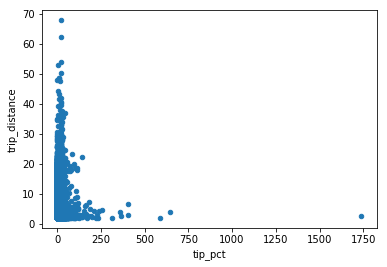

In [5]:
df.plot(kind='scatter', x='tip_pct', y='trip_distance')

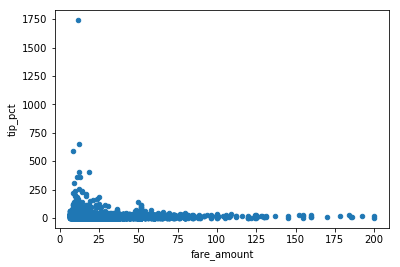

In [6]:
df.plot(kind='scatter', x='fare_amount', y='tip_pct')

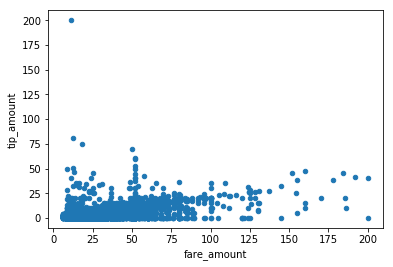

In [7]:
df.plot(kind='scatter', x='fare_amount', y='tip_amount')

In [11]:
df1=pd.io.gbq.read_gbq("""  
SELECT ROUND(pickup_latitude, 4) as lat, ROUND(pickup_longitude, 4) as long, COUNT(*) as num_pickups  
FROM [nyc-tlc:yellow.trips] 
WHERE (pickup_latitude BETWEEN 40.61 AND 40.91) AND (pickup_longitude BETWEEN -74.06 AND -73.77 )  
GROUP BY lat, long  
""", project_id='vmwgui')

Requesting query... ok.
Query running...
  Elapsed 11.64 s. Waiting...
  Elapsed 22.39 s. Waiting...
Query done.
Processed: 16.5 Gb

Retrieving results...
  Got page: 1; 3% done. Elapsed 31.65 s.
  Got page: 2; 6% done. Elapsed 37.9 s.
  Got page: 3; 9% done. Elapsed 45.22 s.
  Got page: 4; 12% done. Elapsed 50.54 s.
  Got page: 5; 15% done. Elapsed 57.49 s.
  Got page: 6; 18% done. Elapsed 63.02 s.
  Got page: 7; 21% done. Elapsed 69.52 s.
  Got page: 8; 24% done. Elapsed 75.88 s.
  Got page: 9; 27% done. Elapsed 81.35 s.
  Got page: 10; 30% done. Elapsed 87.93 s.
  Got page: 11; 33% done. Elapsed 94.06 s.
  Got page: 12; 36% done. Elapsed 99.74 s.
  Got page: 13; 39% done. Elapsed 105.9 s.
  Got page: 14; 42% done. Elapsed 111.35 s.
  Got page: 15; 45% done. Elapsed 118.21 s.
  Got page: 16; 48% done. Elapsed 123.27 s.
  Got page: 17; 51% done. Elapsed 129.89 s.
  Got page: 18; 54% done. Elapsed 136.44 s.
  Got page: 19; 57% done. Elapsed 141.86 s.
  Got page: 20; 60% done. Elapsed 1

In [13]:
df1.head()

,lat,long,num_pickups
0,40.7584,-74.0272,2
1,40.6890,-73.9763,1
2,40.6846,-74.0098,2
3,40.8504,-74.0044,1
4,40.8104,-73.9109,1


/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


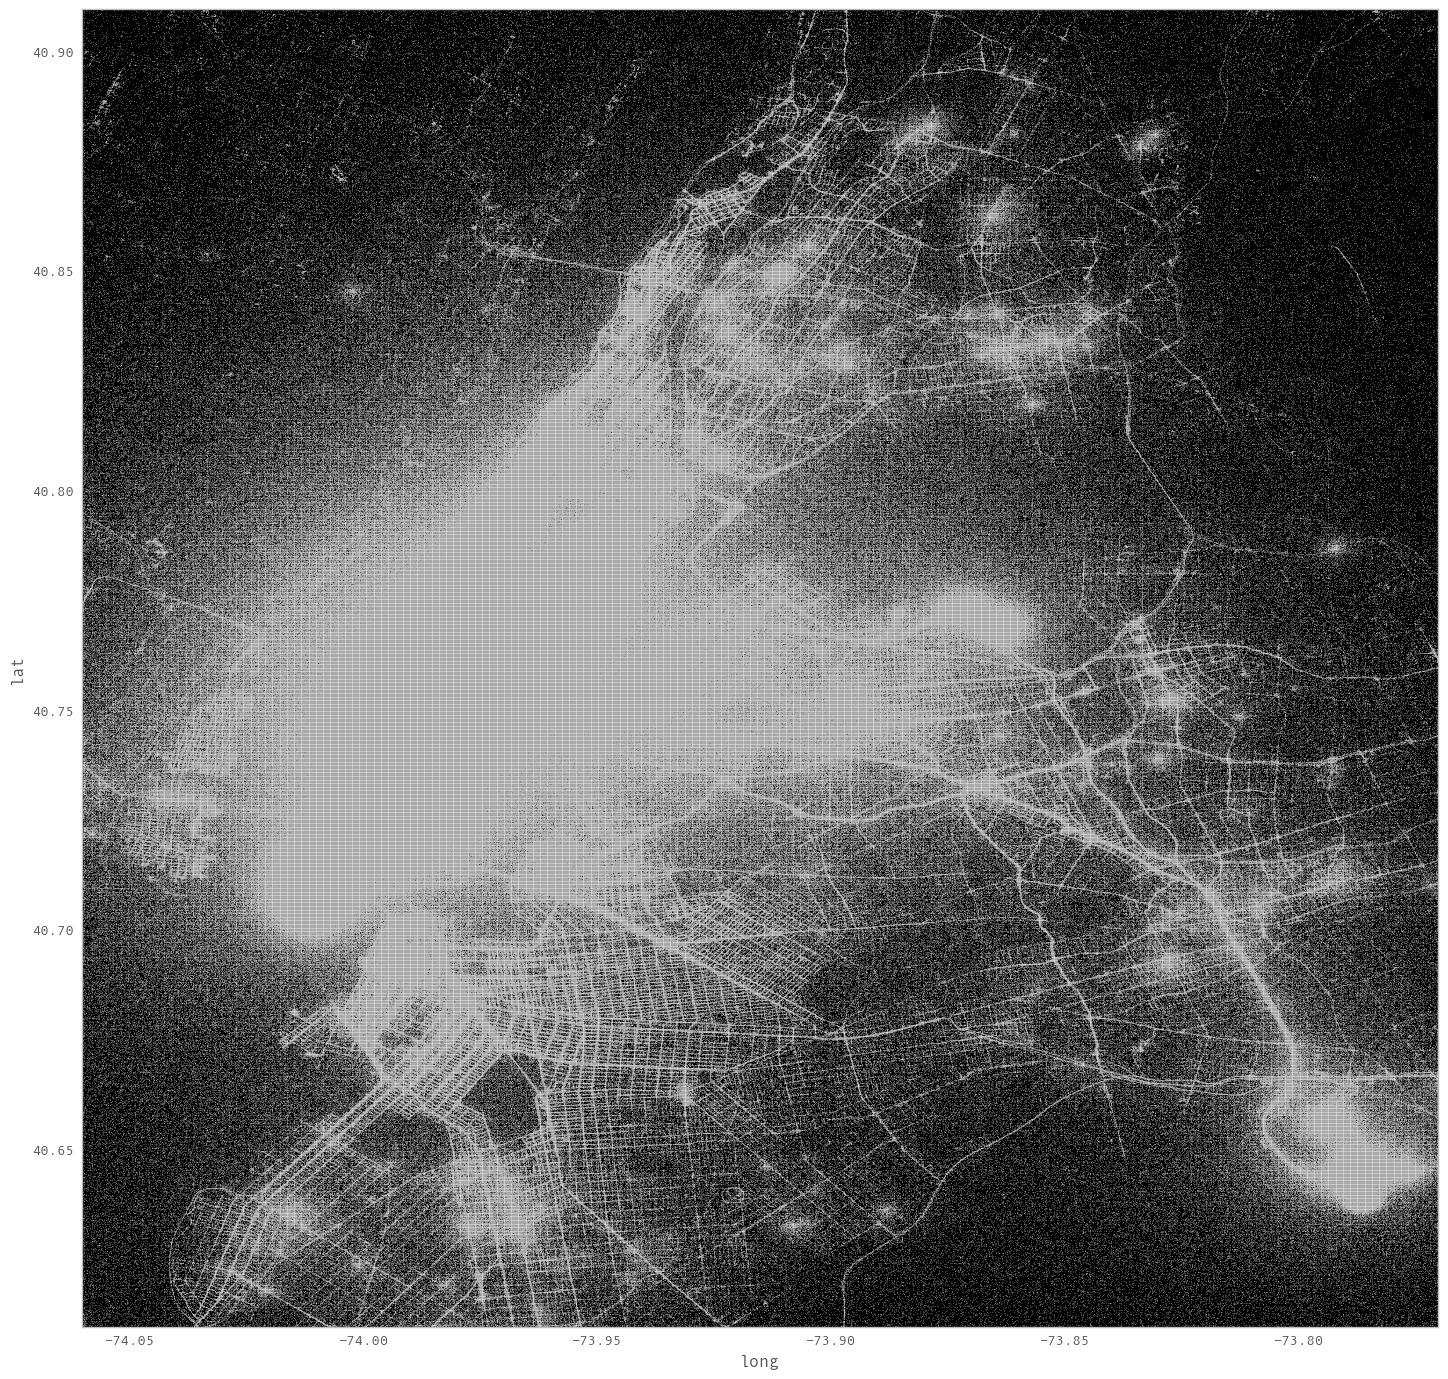

In [17]:
pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (17.5, 17) #Size of figure  
rcParams['figure.dpi'] = 250

#P.set_axis_bgcolor('black') #Background Color

P=df1.plot(kind='scatter', x='long', y='lat',color='white',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
P.set_axis_bgcolor('black')

In [57]:
df_very_generous=pd.io.gbq.read_gbq("""  
SELECT passenger_count, trip_distance, fare_amount, extra, mta_tax, imp_surcharge, tip_amount, tolls_amount, extra/fare_amount as extra_pct
FROM [nyc-tlc:yellow.trips] 
WHERE payment_type = 'CRD' and tip_amount/fare_amount > 30 and fare_amount > 0
""", project_id='vmwgui')
df_very_generous.head()

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ImportError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ImportError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ImportError: No module named 'oauth2client.locked_file'

During handling of t

Requesting query... ok.
Query running...
Query done.
Processed: 62.5 Gb

Retrieving results...
Got 4648 rows.

Total time taken 2.8 s.
Finished at 2017-05-06 22:31:17.


,passenger_count,trip_distance,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,extra_pct
0,5,0.0,2.5,0.5,0.5,NaN,76.5,0.0,0.2
1,1,0.0,2.5,0.0,0.5,NaN,77.0,0.0,0.0
2,5,0.0,2.5,0.5,0.5,NaN,96.5,0.0,0.2
3,1,0.0,2.5,0.0,0.5,NaN,82.0,0.0,0.0
4,1,0.0,2.5,0.0,NaN,NaN,83.0,0.0,0.0


In [102]:
df_very_generous['tip'] = 1
df_very_generous.head(5)

,passenger_count,trip_distance,fare_amount,extra,mta_tax,imp_surcharge,tolls_amount,extra_pct,tip
0,5,0.0,2.5,0.5,0.5,NaN,0.0,0.2,1
1,1,0.0,2.5,0.0,0.5,NaN,0.0,0.0,1
2,5,0.0,2.5,0.5,0.5,NaN,0.0,0.2,1
3,1,0.0,2.5,0.0,0.5,NaN,0.0,0.0,1
4,1,0.0,2.5,0.0,NaN,NaN,0.0,0.0,1


In [59]:
del df_very_generous['tip_amount']

In [60]:
df_very_generous.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,imp_surcharge,tolls_amount,extra_pct,tip
0,5,0.0,2.5,0.5,0.5,NaN,0.0,0.2,1
1,1,0.0,2.5,0.0,0.5,NaN,0.0,0.0,1
2,5,0.0,2.5,0.5,0.5,NaN,0.0,0.2,1
3,1,0.0,2.5,0.0,0.5,NaN,0.0,0.0,1
4,1,0.0,2.5,0.0,NaN,NaN,0.0,0.0,1


In [61]:
len(df_very_generous)

4648

In [62]:
df_no_tip=pd.io.gbq.read_gbq("""  
  
SELECT passenger_count, trip_distance, fare_amount, extra, mta_tax, imp_surcharge, tip_amount, tolls_amount, extra/fare_amount as extra_pct
FROM [nyc-tlc:yellow.trips]
WHERE payment_type = 'CRD' and tip_amount = 0 and fare_amount > 0
LIMIT 4648
""", project_id='vmwgui')
df_no_tip.head()

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ImportError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ImportError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/cathalflanagan/anaconda/lib/python3.5/site-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ImportError: No module named 'oauth2client.locked_file'

During handling of t

Requesting query... ok.
Query running...
Query done.
Processed: 62.5 Gb

Retrieving results...
Got 4648 rows.

Total time taken 2.09 s.
Finished at 2017-05-06 22:31:20.


,passenger_count,trip_distance,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,extra_pct
0,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0
1,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0
2,1,0.0,2.5,0.0,0.0,NaN,0,0.0,0.0
3,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0
4,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0


In [63]:
df_no_tip['tip'] = 0
df_no_tip.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,extra_pct,tip
0,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0,0
1,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0,0
2,1,0.0,2.5,0.0,0.0,NaN,0,0.0,0.0,0
3,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0,0
4,1,0.0,2.5,0.0,NaN,NaN,0,0.0,0.0,0


In [96]:
frames = [df_no_tip, df_very_generous]
data = pd.concat(frames)
data.head()
data = data.fillna(0)
Y = data['tip']
del data['tip']

#del data['imp_surcharge']
#del data['mta_tax']

X = data


In [69]:
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
import sys
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


#four classifier types
clf = tree.DecisionTreeClassifier()
#clf1 = svm.SVC() #removing because preditproba not supported
clf1 = LogisticRegression()
clf2 = neighbors.KNeighborsClassifier()
clf3 = naive_bayes.GaussianNB()
eclf = VotingClassifier(estimators=[('dt', clf), ('svc', clf1), ('knn', clf2), ('NB', clf3)], voting='soft', weights=[2,1,2,2])


In [98]:
clf = clf.fit(X, Y)
clf1 = clf1.fit(X,Y)
clf2 = clf2.fit(X,Y)
clf3 = clf3.fit(X,Y)
eclf = eclf.fit(X,Y)



for clf, label in zip([clf, clf1, clf2, clf3, eclf], ['DecisionTreeClassifier', 'LogReg', 'KNN', 'NB','Ensemble']):
            scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
            print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.67 (+/- 0.12) [DecisionTreeClassifier]
Accuracy: 0.91 (+/- 0.14) [LogReg]
Accuracy: 0.77 (+/- 0.10) [KNN]
Accuracy: 0.67 (+/- 0.01) [NB]
Accuracy: 0.83 (+/- 0.12) [Ensemble]
